In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from utils.util_funcs import build_columns_for_df, read_from_csv, save_to_csv

In [2]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

ind_data = pd.DataFrame()

for t in tickers:
    my_data = yf.download(t, start='1997-01-01')
    columns = build_columns_for_df(my_data)
    save_to_csv(my_data, t)
    ind_data[t] = read_from_csv(t, columns)['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
ind_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7105 entries, 1997-01-02 to 2025-03-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   7105 non-null   float64
 1   ^IXIC   7105 non-null   float64
 2   ^GDAXI  6980 non-null   float64
 3   ^FTSE   6973 non-null   float64
dtypes: float64(4)
memory usage: 277.5+ KB


In [4]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [5]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-03-24,5767.569824,18188.589844,22852.660156,8638.000000
2025-03-25,5776.649902,18271.859375,23109.789062,8663.799805
2025-03-26,5712.200195,17899.019531,22839.029297,8689.599609
2025-03-27,5693.310059,17804.029297,22678.740234,8666.099609
2025-03-28,5580.939941,17322.990234,22461.519531,8658.849609


<Axes: xlabel='Date'>

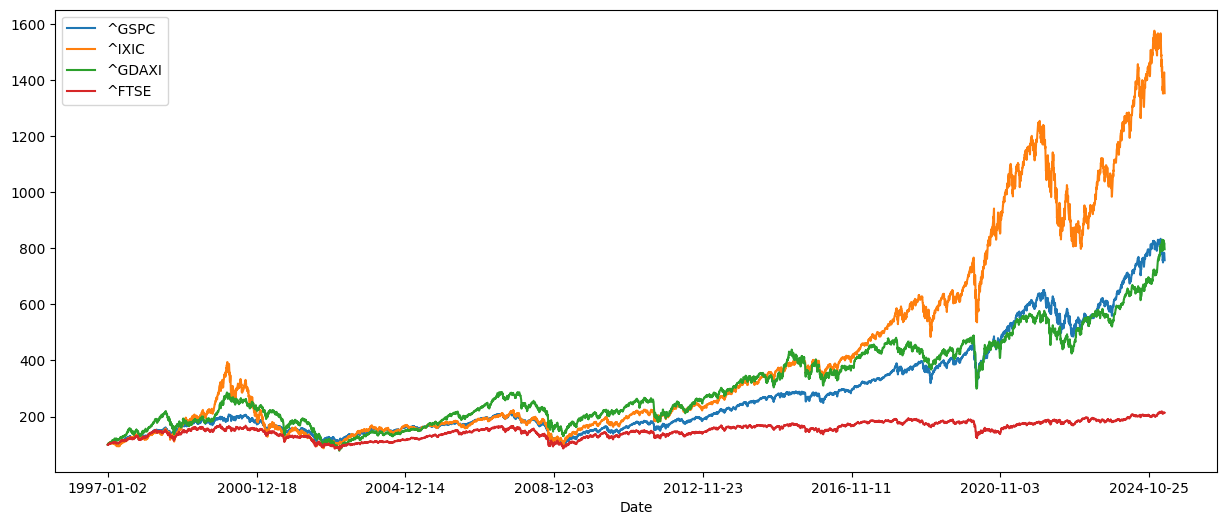

In [6]:
# Normalize data
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))

In [7]:
ind_returns = (ind_data / ind_data.shift(1)) -1
print(ind_returns.tail())

               ^GSPC     ^IXIC    ^GDAXI     ^FTSE
Date                                              
2025-03-24  0.017646  0.022747 -0.001705 -0.001018
2025-03-25  0.001574  0.004578  0.011252  0.002987
2025-03-26 -0.011157 -0.020405 -0.011716  0.002978
2025-03-27 -0.003307 -0.005307 -0.007018 -0.002704
2025-03-28 -0.019737 -0.027019 -0.009578 -0.000837


In [8]:
annual_ind_returns = ind_returns.mean() * 250
print(annual_ind_returns)

^GSPC     0.089788
^IXIC     0.122382
^GDAXI    0.086352
^FTSE     0.039727
dtype: float64


## Calculate the PG, GSPC (SP&500) and DJI

In [12]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    my_data_2 = yf.download(t, start='2007-01-01')
    columns = build_columns_for_df(my_data_2)
    save_to_csv(my_data_2, t)
    data_2[t] = read_from_csv(t, columns)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2025-03-24,165.649994,5767.569824,42583.320312
2025-03-25,162.850006,5776.649902,42587.500000
2025-03-26,166.580002,5712.200195,42454.789062
2025-03-27,168.710007,5693.310059,42299.699219
2025-03-28,168.029999,5580.939941,41583.898438


In [14]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2025-03-24,165.649994,5767.569824,42583.320312
2025-03-25,162.850006,5776.649902,42587.500000
2025-03-26,166.580002,5712.200195,42454.789062
2025-03-27,168.710007,5693.310059,42299.699219
2025-03-28,168.029999,5580.939941,41583.898438


<Axes: xlabel='Date'>

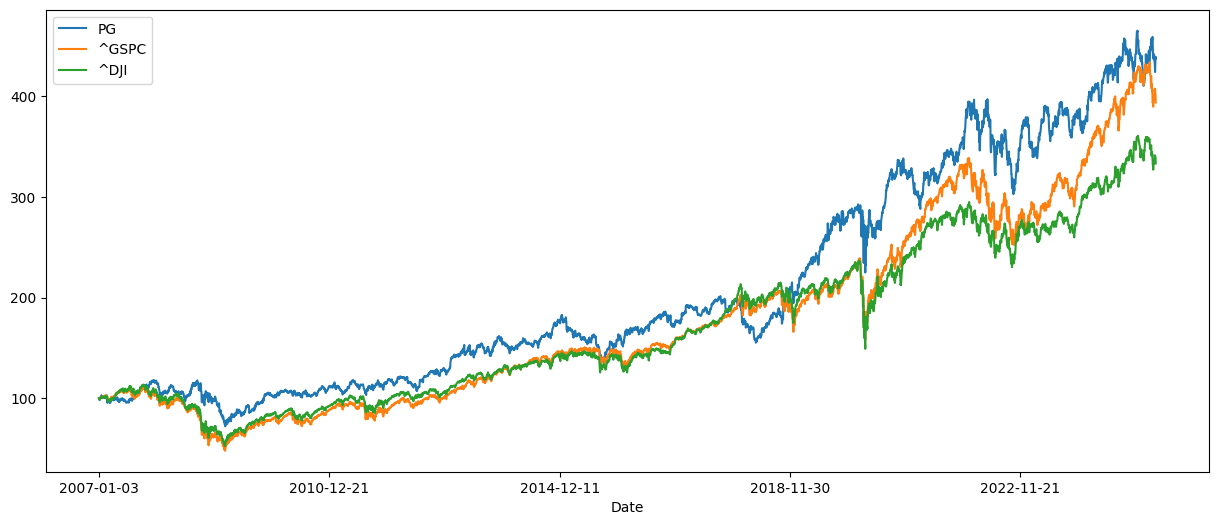

In [15]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15,6))